In [2]:
#Data Preparation
import pandas as pd

# Load the dataset with a different encoding (e.g., 'latin1')
df = pd.read_csv('C:/users/DELL/GRAI.csv', encoding='latin1')

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ministries_Departments  30 non-null     object 
 1   Timeline                30 non-null     float64
 2   Registration            30 non-null     float64
 3   Appeals_Redressed       29 non-null     float64
 4   Corruption              30 non-null     float64
 5   Average_Disposal_Time   30 non-null     int64  
 6   Pendency                30 non-null     float64
 7   Appeal_filed            30 non-null     float64
 8   Excellent_remarks       30 non-null     float64
 9   Complaint_labelled      30 non-null     float64
 10  Adequacy                30 non-null     float64
 11  Ratio_GROs              30 non-null     float64
 12  Active_GROs             30 non-null     float64
 13  Unnamed: 13             0 non-null      float64
dtypes: float64(12), int64(1), object(1)
memory u

In [3]:
# Feature engineering
# For example:
# Encode categorical variables
# Specify column names explicitly
df = pd.read_csv('C:/users/DELL/GRAI.csv', encoding='latin1', names=['Ministries_Departments', 'Timeline', 'Registration','Appeals_Redressed', 'Corruption', 'Average_Disposal_Time', 'Pendency', 'Appeal_filed', 'Excellent_remarks', 'Complaint_Labelled', 'Adequacy', 'Ratio_GROs', 'Active_GROs'])


In [7]:
print(df.dtypes)


Ministries_Departments     object
Timeline                   object
Registration               object
Appeals_Redressed          object
Corruption                 object
Average_Disposal_Time      object
Pendency                   object
Appeal_filed               object
Excellent_remarks          object
Complaint_Labelled         object
Adequacy                   object
Ratio_GROs                 object
Active_GROs               float64
dtype: object


In [6]:
# Feature engineering
# For example:
# Encode categorical variables
df = pd.get_dummies(df, columns=['Ministries_Departments'])


In [10]:
import pandas as pd

# Load your dataset into a DataFrame
# Assuming df is your DataFrame containing the data
df = pd.read_csv('C:/users/DELL/GRAI.csv')

# List of columns to convert to float
columns_to_convert = ['Timeline', 'Registration', 'Appeals_Redressed', 'Corruption', 'Average_Disposal_Time', 'Pendency', 'Appeal_filed', 'Excellent_remarks', 'Complaint_labelled', 'Adequacy', 'Ratio_GROs', 'Active_GROs']

# Clean or preprocess non-numeric data in the specified columns
df[columns_to_convert] = df[columns_to_convert].replace('[^\d.]', '', regex=True)

# Convert specified columns to float type
df[columns_to_convert] = df[columns_to_convert].astype(float)

# Verify the data types after conversion
print(df.dtypes)


Ministries_Departments     object
Timeline                  float64
Registration              float64
Appeals_Redressed         float64
Corruption                float64
Average_Disposal_Time     float64
Pendency                  float64
Appeal_filed              float64
Excellent_remarks         float64
Complaint_labelled        float64
Adequacy                  float64
Ratio_GROs                float64
Active_GROs               float64
Unnamed: 13               float64
dtype: object


In [12]:
df.describe()

,Timeline,Registration,Appeals_Redressed,Corruption,Average_Disposal_Time,Pendency,Appeal_filed,Excellent_remarks,Complaint_labelled,Adequacy,Ratio_GROs,Active_GROs,Unnamed: 13
count,30.000000,30.000000,29.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,0.0
mean,70.767333,41.626333,21.100345,94.102000,29.133333,0.471667,14.600000,19.050667,91.099333,6.891333,205.646333,21.387667,NaN
std,18.652211,185.537735,11.138341,9.689095,25.018246,1.037687,8.209428,7.886116,6.707268,7.244090,408.752584,13.411476,NaN
min,25.710000,-39.060000,0.000000,44.950000,8.000000,0.000000,0.000000,4.710000,69.950000,0.110000,1.410000,0.720000,NaN
25%,61.635000,-9.862500,15.120000,93.587500,14.000000,0.000000,10.727500,13.955000,87.997500,0.600000,30.800000,10.085000,NaN
50%,73.420000,6.225000,19.230000,96.055000,21.000000,0.040000,14.110000,19.105000,92.075000,4.730000,56.870000,19.640000,NaN
75%,85.412500,19.917500,26.400000,97.982500,30.750000,0.232500,17.737500,23.867500,96.152500,12.180000,171.847500,30.472500,NaN
max,96.310000,1012.930000,46.970000,99.950000,116.000000,4.170000,39.000000,37.710000,100.000000,21.620000,1855.630000,54.550000,NaN


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


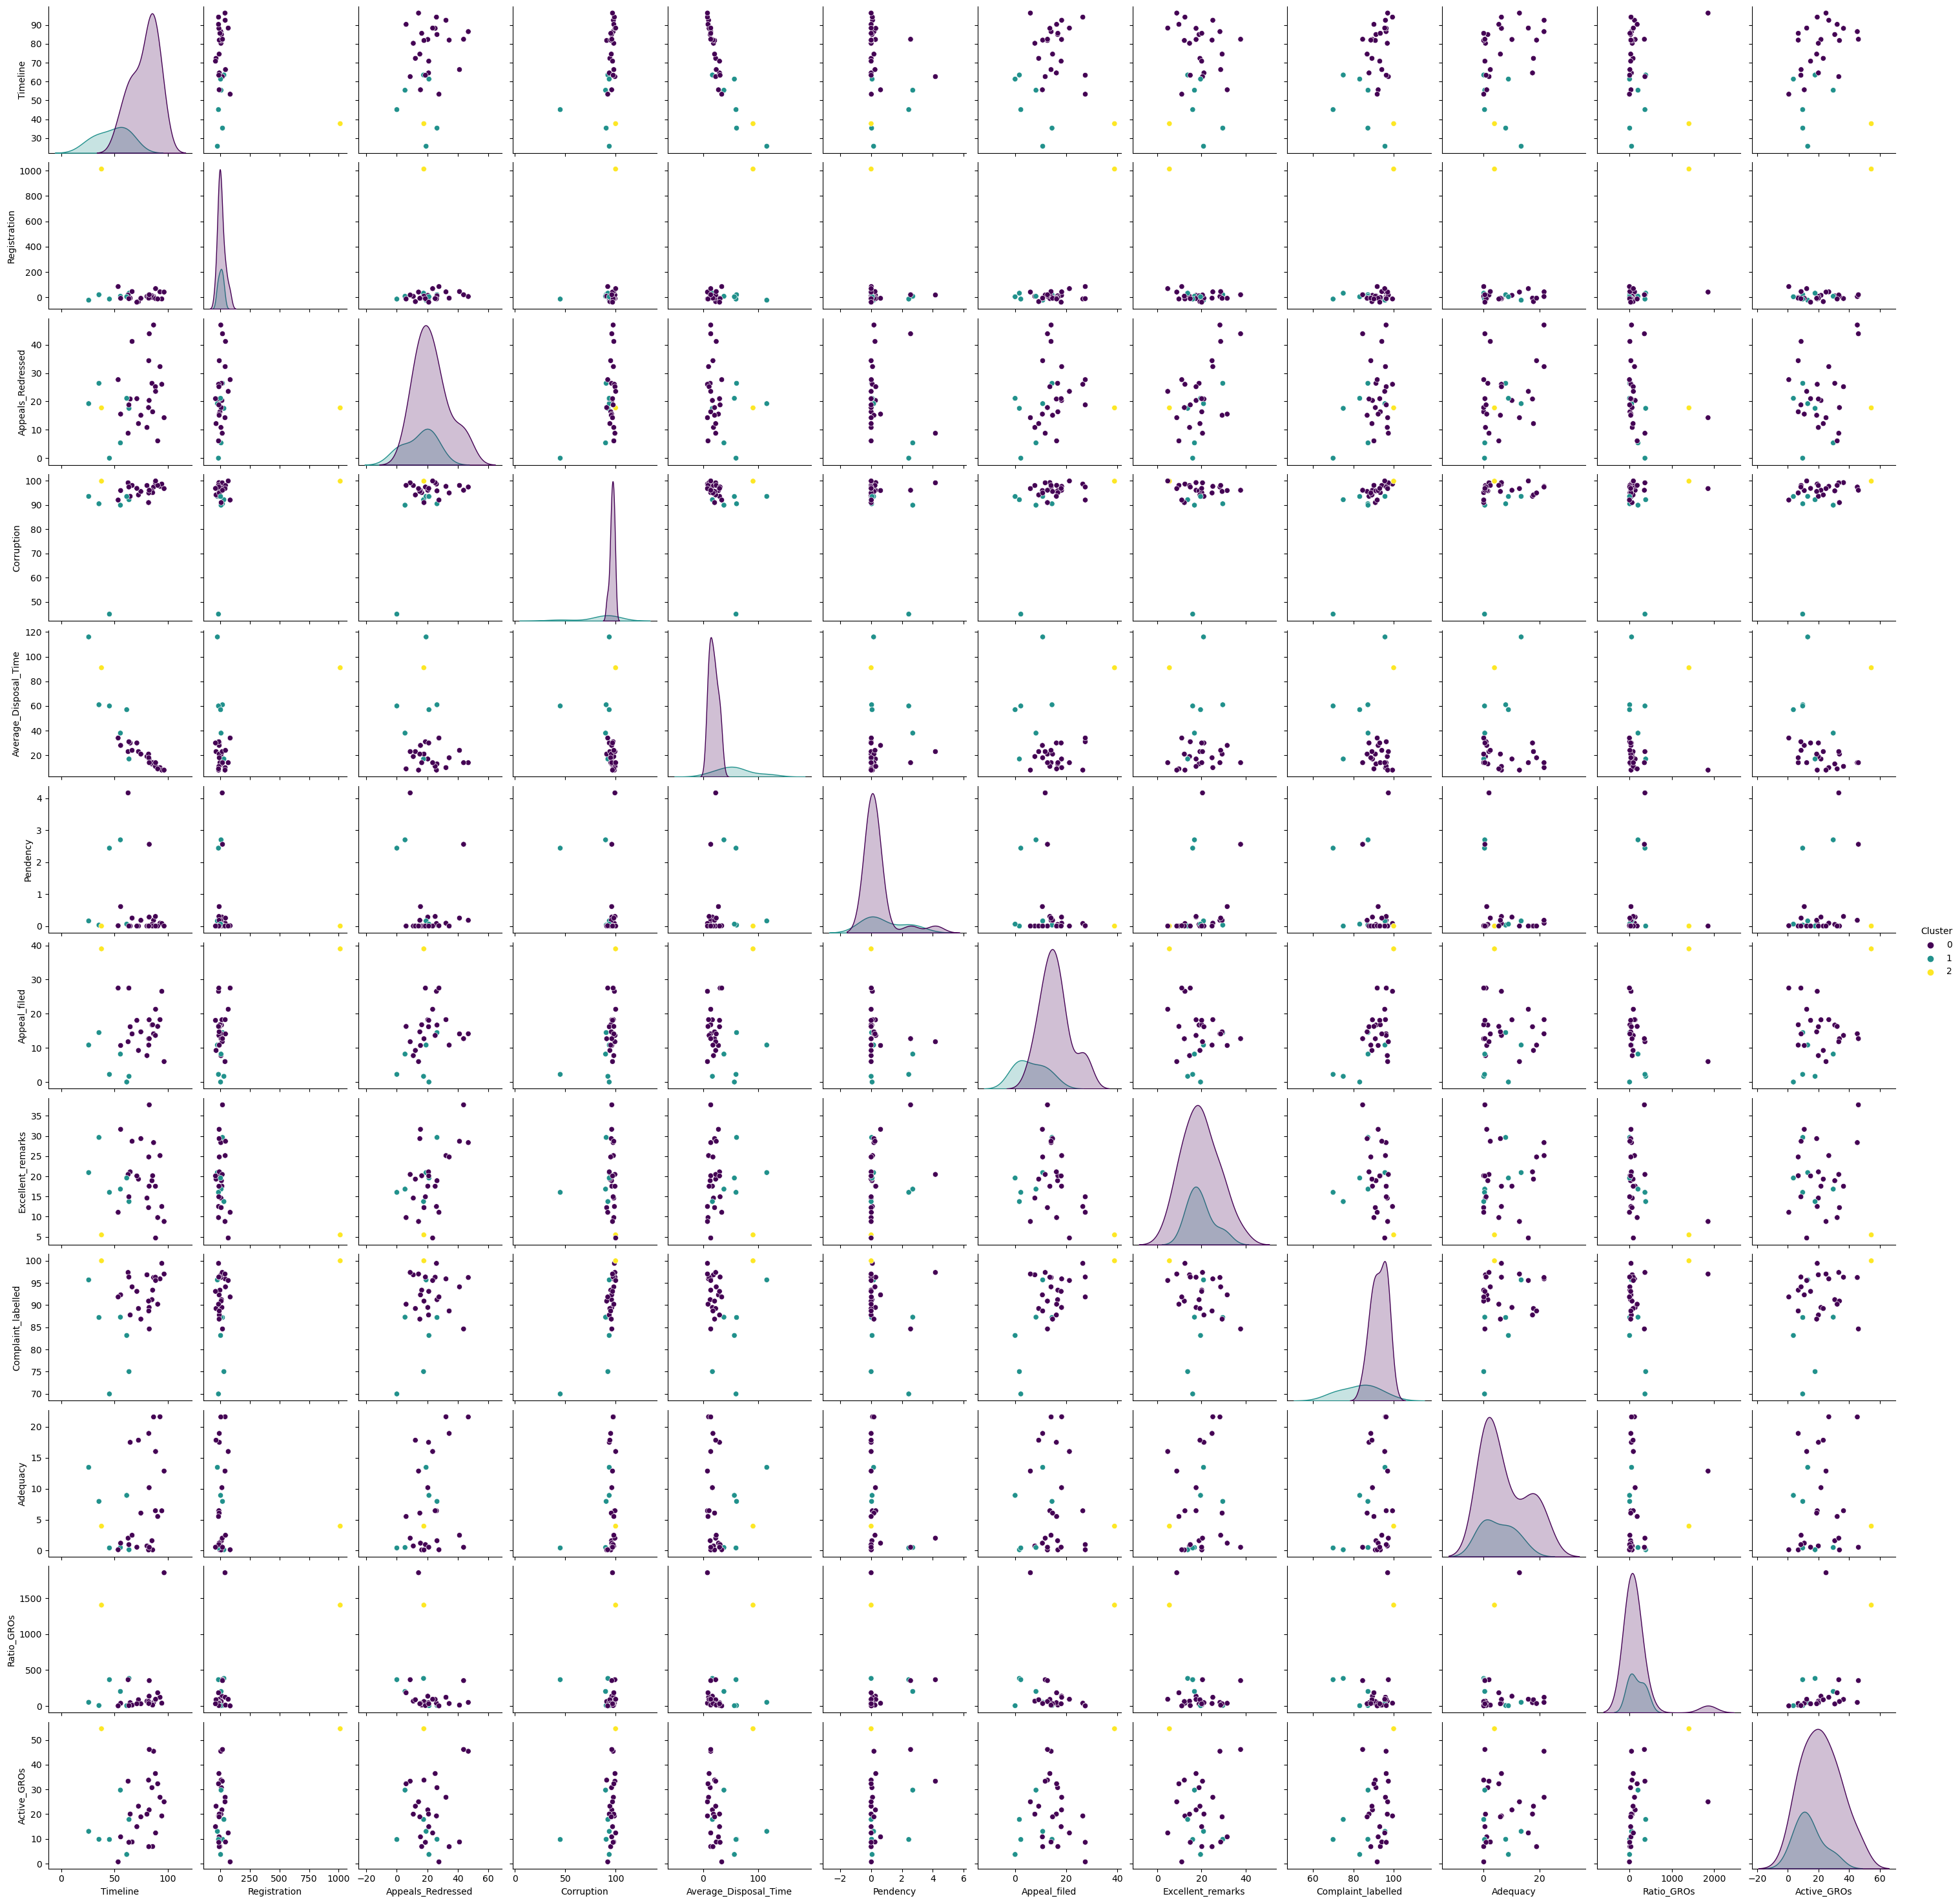

In [19]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Read the data
df = pd.read_csv('C:/Users/DELL/GRAI.csv')

# Drop non-numeric column (department names)
numeric_df = df.drop(columns=['Ministries_Departments'])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
numeric_df_imputed = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)

# Scale the data
scaler = StandardScaler()
numeric_df_scaled = scaler.fit_transform(numeric_df_imputed)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
numeric_df_imputed['Cluster'] = kmeans.fit_predict(numeric_df_scaled)

# Visualize the clusters
sns.pairplot(numeric_df_imputed, hue='Cluster', palette='viridis')
plt.show()


In [21]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import plotly.graph_objects as go
import numpy as np
from scipy.interpolate import griddata

# Read the data
df = pd.read_csv('C:/Users/DELL/GRAI.csv')

# Drop non-numeric column (department names)
numeric_df = df.drop(columns=['Ministries_Departments'])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
numeric_df_imputed = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)

# Scale the data
scaler = StandardScaler()
numeric_df_scaled = scaler.fit_transform(numeric_df_imputed)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
numeric_df_imputed['Cluster'] = kmeans.fit_predict(numeric_df_scaled)

# Create a meshgrid for the surface plot
x = np.linspace(min(numeric_df_imputed['Timeline']), max(numeric_df_imputed['Timeline']), 100)
y = np.linspace(min(numeric_df_imputed['Registration']), max(numeric_df_imputed['Registration']), 100)
X, Y = np.meshgrid(x, y)

# Interpolate the data onto the grid
Z = griddata((numeric_df_imputed['Timeline'], numeric_df_imputed['Registration']), numeric_df_imputed['Appeals_Redressed'], (X, Y), method='cubic')

# Create the surface plot
fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z)])
fig.update_layout(title='Surface Plot of Appeals_Redressed', scene=dict(xaxis_title='Timeline', yaxis_title='Registration', zaxis_title='Appeals_Redressed'))
fig.show()


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

# Read the data
df = pd.read_csv('C:/Users/DELL/GRAI.csv')

# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Handle missing values (impute or drop)
numeric_df.dropna(inplace=True)  # Drop rows with missing values

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Apply clustering algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
numeric_df['Cluster'] = cluster_labels

# Visualize clusters (example: 3D scatter plot)
fig = px.scatter_3d(numeric_df, x='Timeline', y='Registration', z='Appeals_Redressed', color='Cluster')
fig.show()


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns

# Calculate the silhouette score
silhouette_avg = silhouette_score(imputed_df, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=imputed_df, x='X_column', y='Y_column', hue='Cluster', palette='viridis', legend='full')
plt.title('KMeans Clustering')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.show()


Silhouette Score: 0.8473763920141212


ValueError: Could not interpret value `X_column` for parameter `x`

<Figure size 1000x600 with 0 Axes>

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features (X) and target variable (y)
X = df[['Timeline', 'Registration', 'Appeals_Redressed', 'Corruption', 'Average_Disposal_Time', 'Pendency', 'Appeal_filed', 'Excellent_remarks', 'Complaint_labelled', 'Adequacy', 'Ratio_GROs', 'Active_GROs']]
y = df['Average_Disposal_Time']  # Replace 'target_variable' with the name of your target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline with an imputer to handle missing values and a linear regression model
pipeline = make_pipeline(SimpleImputer(strategy='mean'), LinearRegression())

# Train the model on the training data using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2.7136815139602806e-28


In [14]:
import seaborn as sns

# Concatenate X_train and y_train into a single DataFrame for plotting
train_data = X_train.copy()
train_data['Average_Disposal_Time'] = y_train

# Create a scatter plot matrix
sns.pairplot(train_data)
plt.show()


ValueError: Columns must be same length as key

In [35]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 1.0066022089934753e-14


In [36]:
from sklearn.metrics import r2_score

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)


R-squared (R2) Score: 1.0


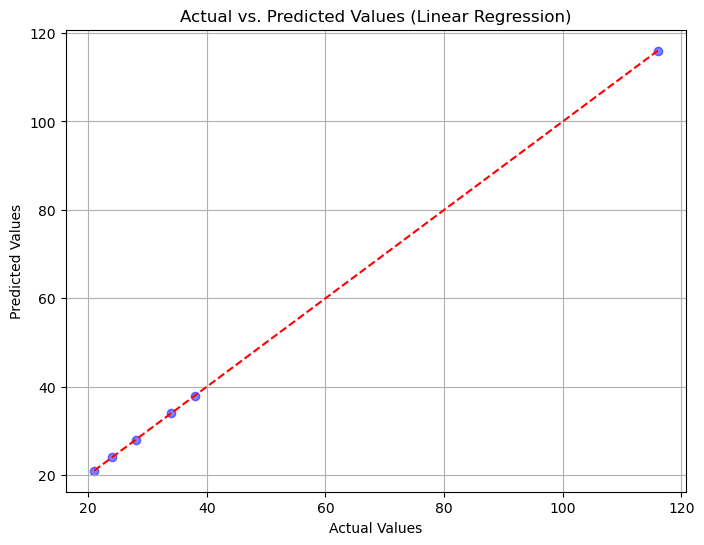

In [50]:
import matplotlib.pyplot as plt

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


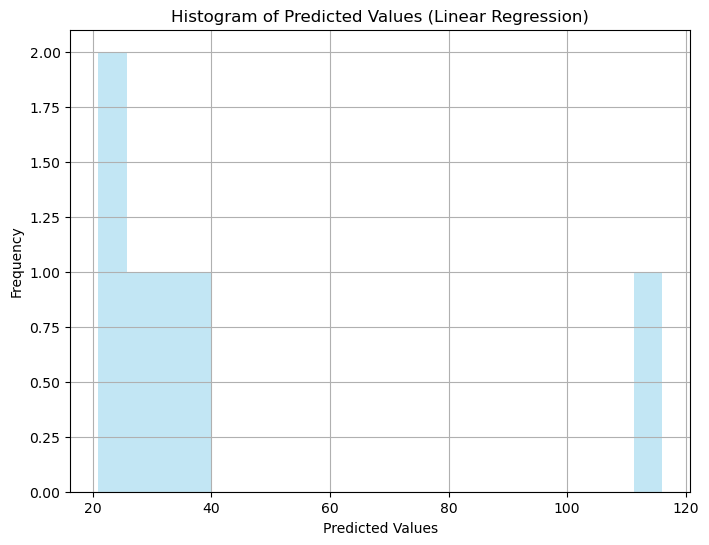

In [51]:
import matplotlib.pyplot as plt

# Histogram Plot
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=20, color='skyblue', alpha=0.5)
plt.title('Histogram of Predicted Values (Linear Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


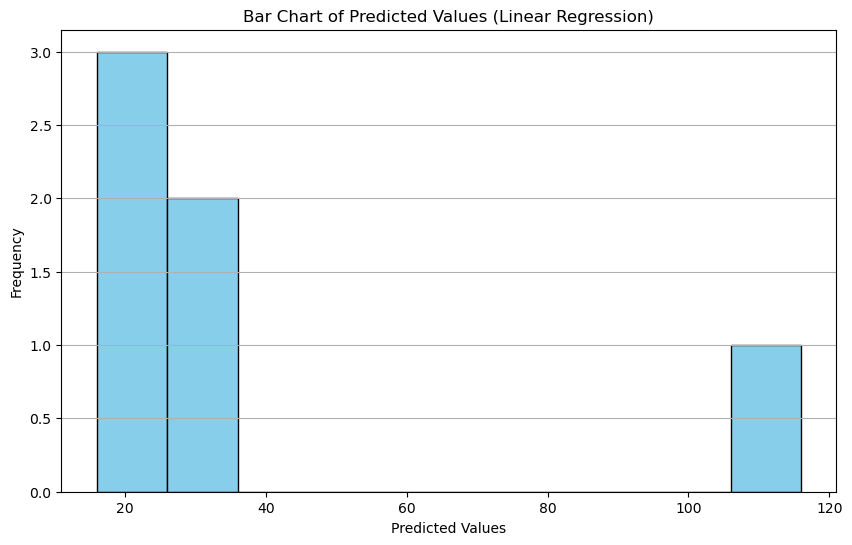

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Define bins for the predicted values
bins = np.arange(min(y_pred), max(y_pred) + 10, 10)  # Adjust bin width as needed

# Count the frequency of predictions falling into each bin
hist, _ = np.histogram(y_pred, bins=bins)

# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], hist, width=10, color='skyblue', edgecolor='black')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Bar Chart of Predicted Values (Linear Regression)')
plt.grid(axis='y')
plt.show()


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and preprocess the data
# Assuming df is your DataFrame containing the data
# Replace 'target_variable' with the name of your target column
X = df[['Timeline', 'Registration', 'Appeals_Redressed', 'Corruption', 'Average_Disposal_Time', 'Pendency', 'Appeal_filed', 'Excellent_remarks', 'Complaint_labelled', 'Adequacy', 'Ratio_GROs', 'Active_GROs']]
y = df['Average_Disposal_Time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline with an imputer to handle missing values and a Random Forest model
pipeline_rf = make_pipeline(SimpleImputer(strategy='mean'), RandomForestRegressor(n_estimators=100, random_state=42))

# Train the model on the training data using the pipeline
pipeline_rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = pipeline_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Model Metrics:")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("R-squared (R2) Score:", r2_rf)


Random Forest Model Metrics:
Mean Squared Error: 566.0740333333333
Mean Absolute Error: 13.786666666666667
R-squared (R2) Score: 0.4777513338971323


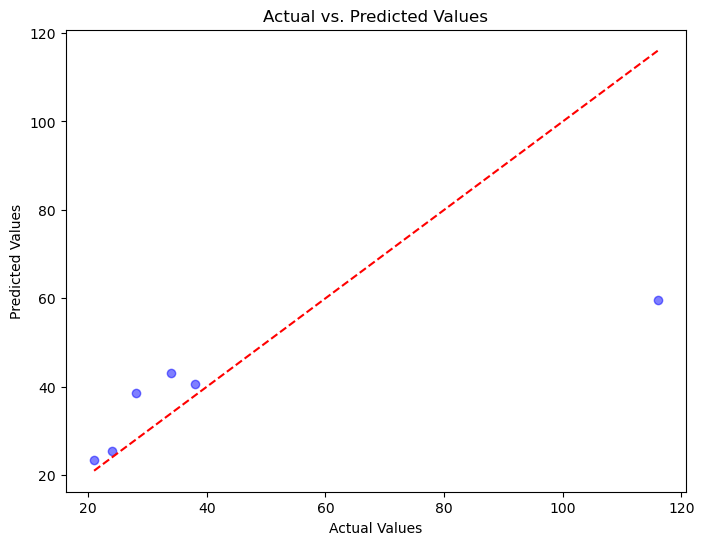

In [40]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


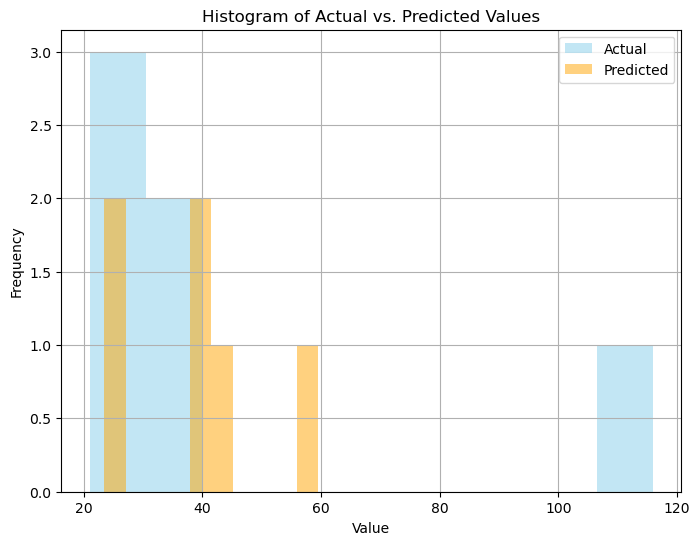

In [47]:
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=10, color='skyblue', alpha=0.5, label='Actual')
plt.hist(y_pred_rf, bins=10, color='orange', alpha=0.5, label='Predicted')
plt.title('Histogram of Actual vs. Predicted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()



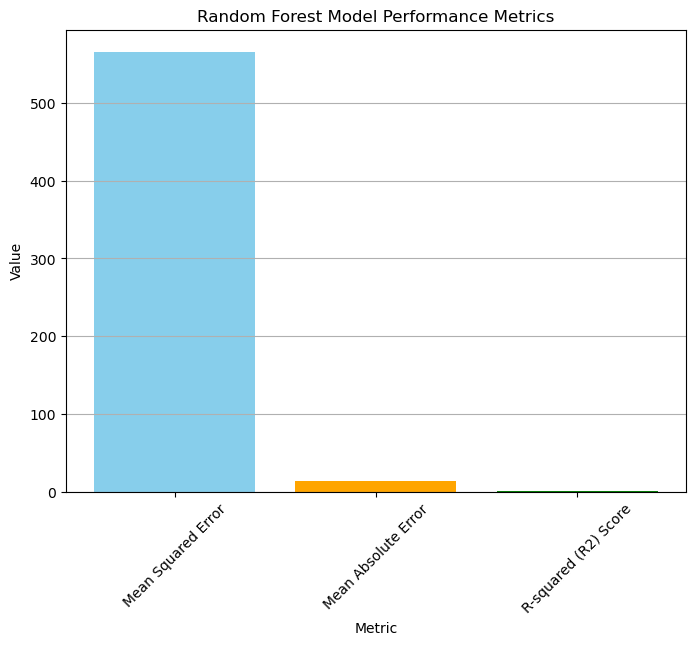

In [49]:
import matplotlib.pyplot as plt

# Calculate model metrics
metrics = ['Mean Squared Error', 'Mean Absolute Error', 'R-squared (R2) Score']
values = [mse_rf, mae_rf, r2_rf]

# Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['skyblue', 'orange', 'green'])
plt.title('Random Forest Model Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
